# 启动notebook前测试

In [79]:
print('final homework')

final homework


# 导入头文件

In [100]:
# -*- coding: gb2312 -*-
from typing import Any
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import matplotlib
import joblib
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree._export import export_text
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import  scienceplots
import seaborn as sns
plt.style.use('science')
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

# 观察数据

In [81]:
data:pd.DataFrame = pd.read_csv('HR_dataset.csv');
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [82]:
data.shape

(14999, 10)

# 数据清洗和处理

In [83]:
# 查看是否有重复列
data.duplicated().sum()

3008

In [84]:
#删除重复行
data = data.drop_duplicates().reset_index().drop('index',axis=1)

In [85]:
data.duplicated().sum()

0

In [86]:
# 查看有无缺失列
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# 数据可视化

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


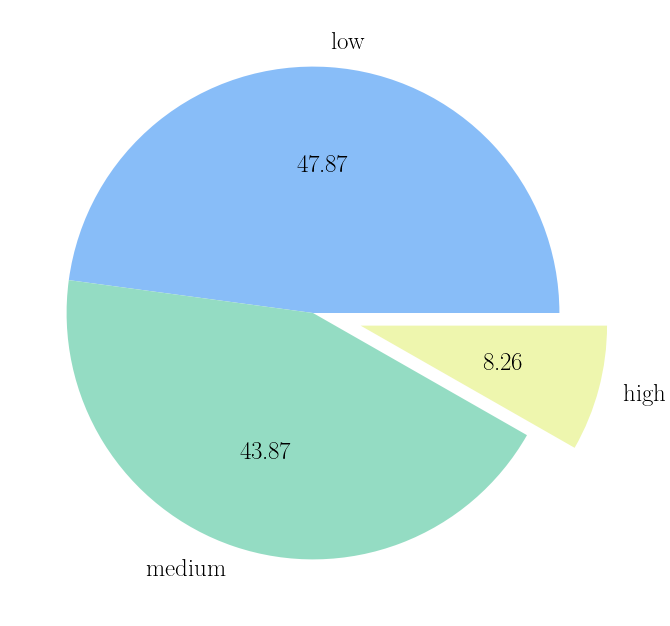

In [87]:
# 我们想统计薪水分布,画饼图
df_salary = data['salary'].value_counts()
print(df_salary)
colors = ['#88bdf8','#94dcc3','#eef6ae'] #设置不同扇区的颜色
fig:plt.Figure = plt.figure(figsize=(10,8))
ax1:plt.Axes = fig.add_subplot(111)
ax1.pie(x=df_salary,labels=df_salary.index,autopct='%.2f%%', textprops={'fontsize': 18},colors=colors,explode=[0,0.0,0.2])
plt.savefig('figure1.svg')

In [88]:
# 绘制箱型图
data_box_filitered = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'] #挑出想要画箱型图的数据
print(len(data_box_filitered))#一共7个
df2 = data[data_box_filitered]
df2.head()

7


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


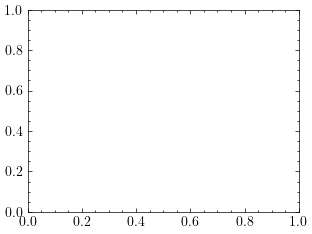

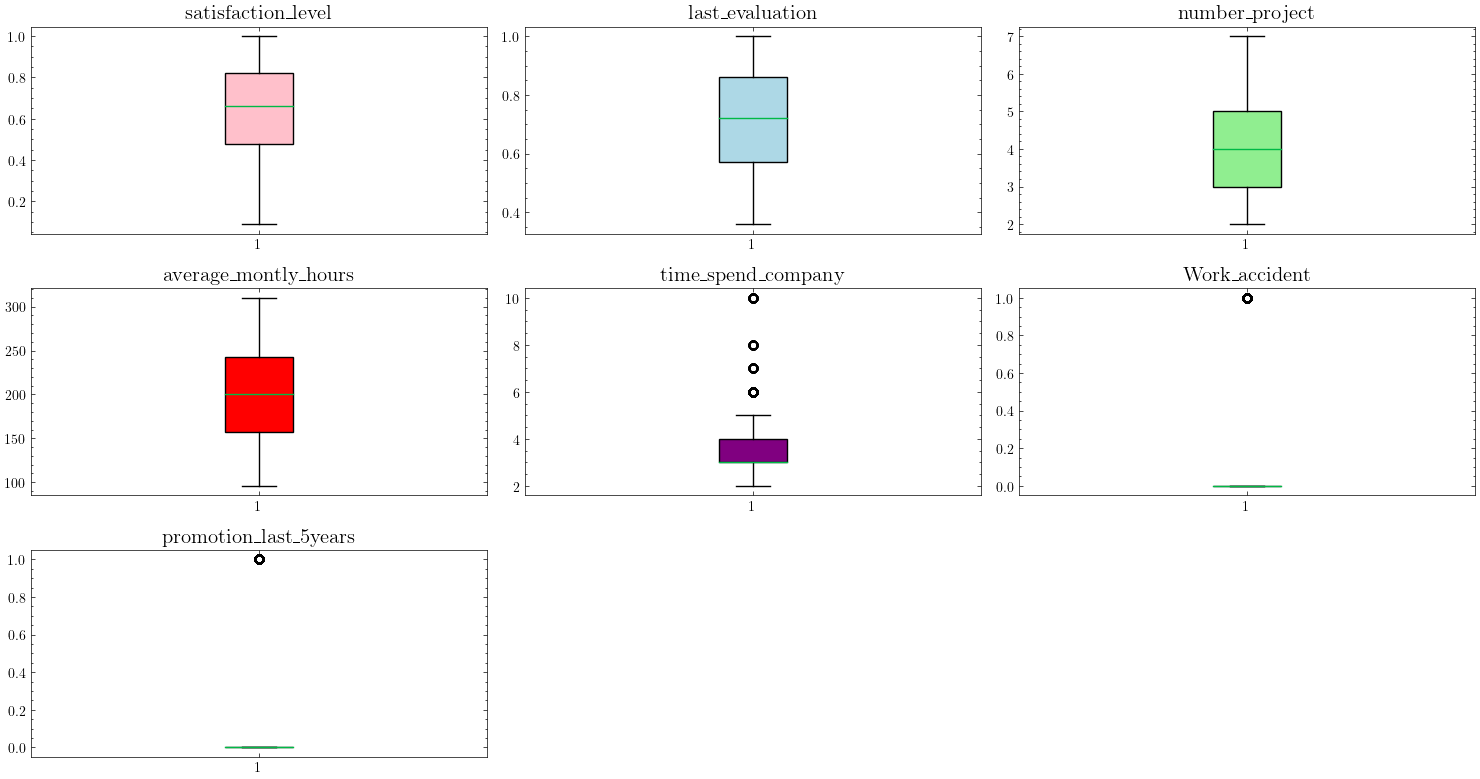

In [89]:
#画图
plt.cla()
fig2:plt.Figure = plt.figure(figsize=(15,8))
colors = ['pink', 'lightblue', 'lightgreen', 'red', 'purple', 'orange', 'yellow']# 准备好不同的颜色
#在3*3的画布上画7张图
for i in range (1,8):
    ax:plt.Axes =fig2.add_subplot(3,3,i)
    ax.boxplot(
        x = df2[data_box_filitered[i-1]],
        patch_artist=True,
        boxprops={'facecolor':colors[i-1]},
    )
    ax.set_title(data_box_filitered[i-1],fontsize=15)
plt.tight_layout()
plt.savefig('figure2.svg')

E:\pythonProject4\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


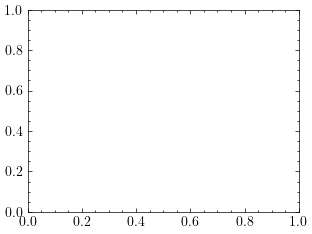

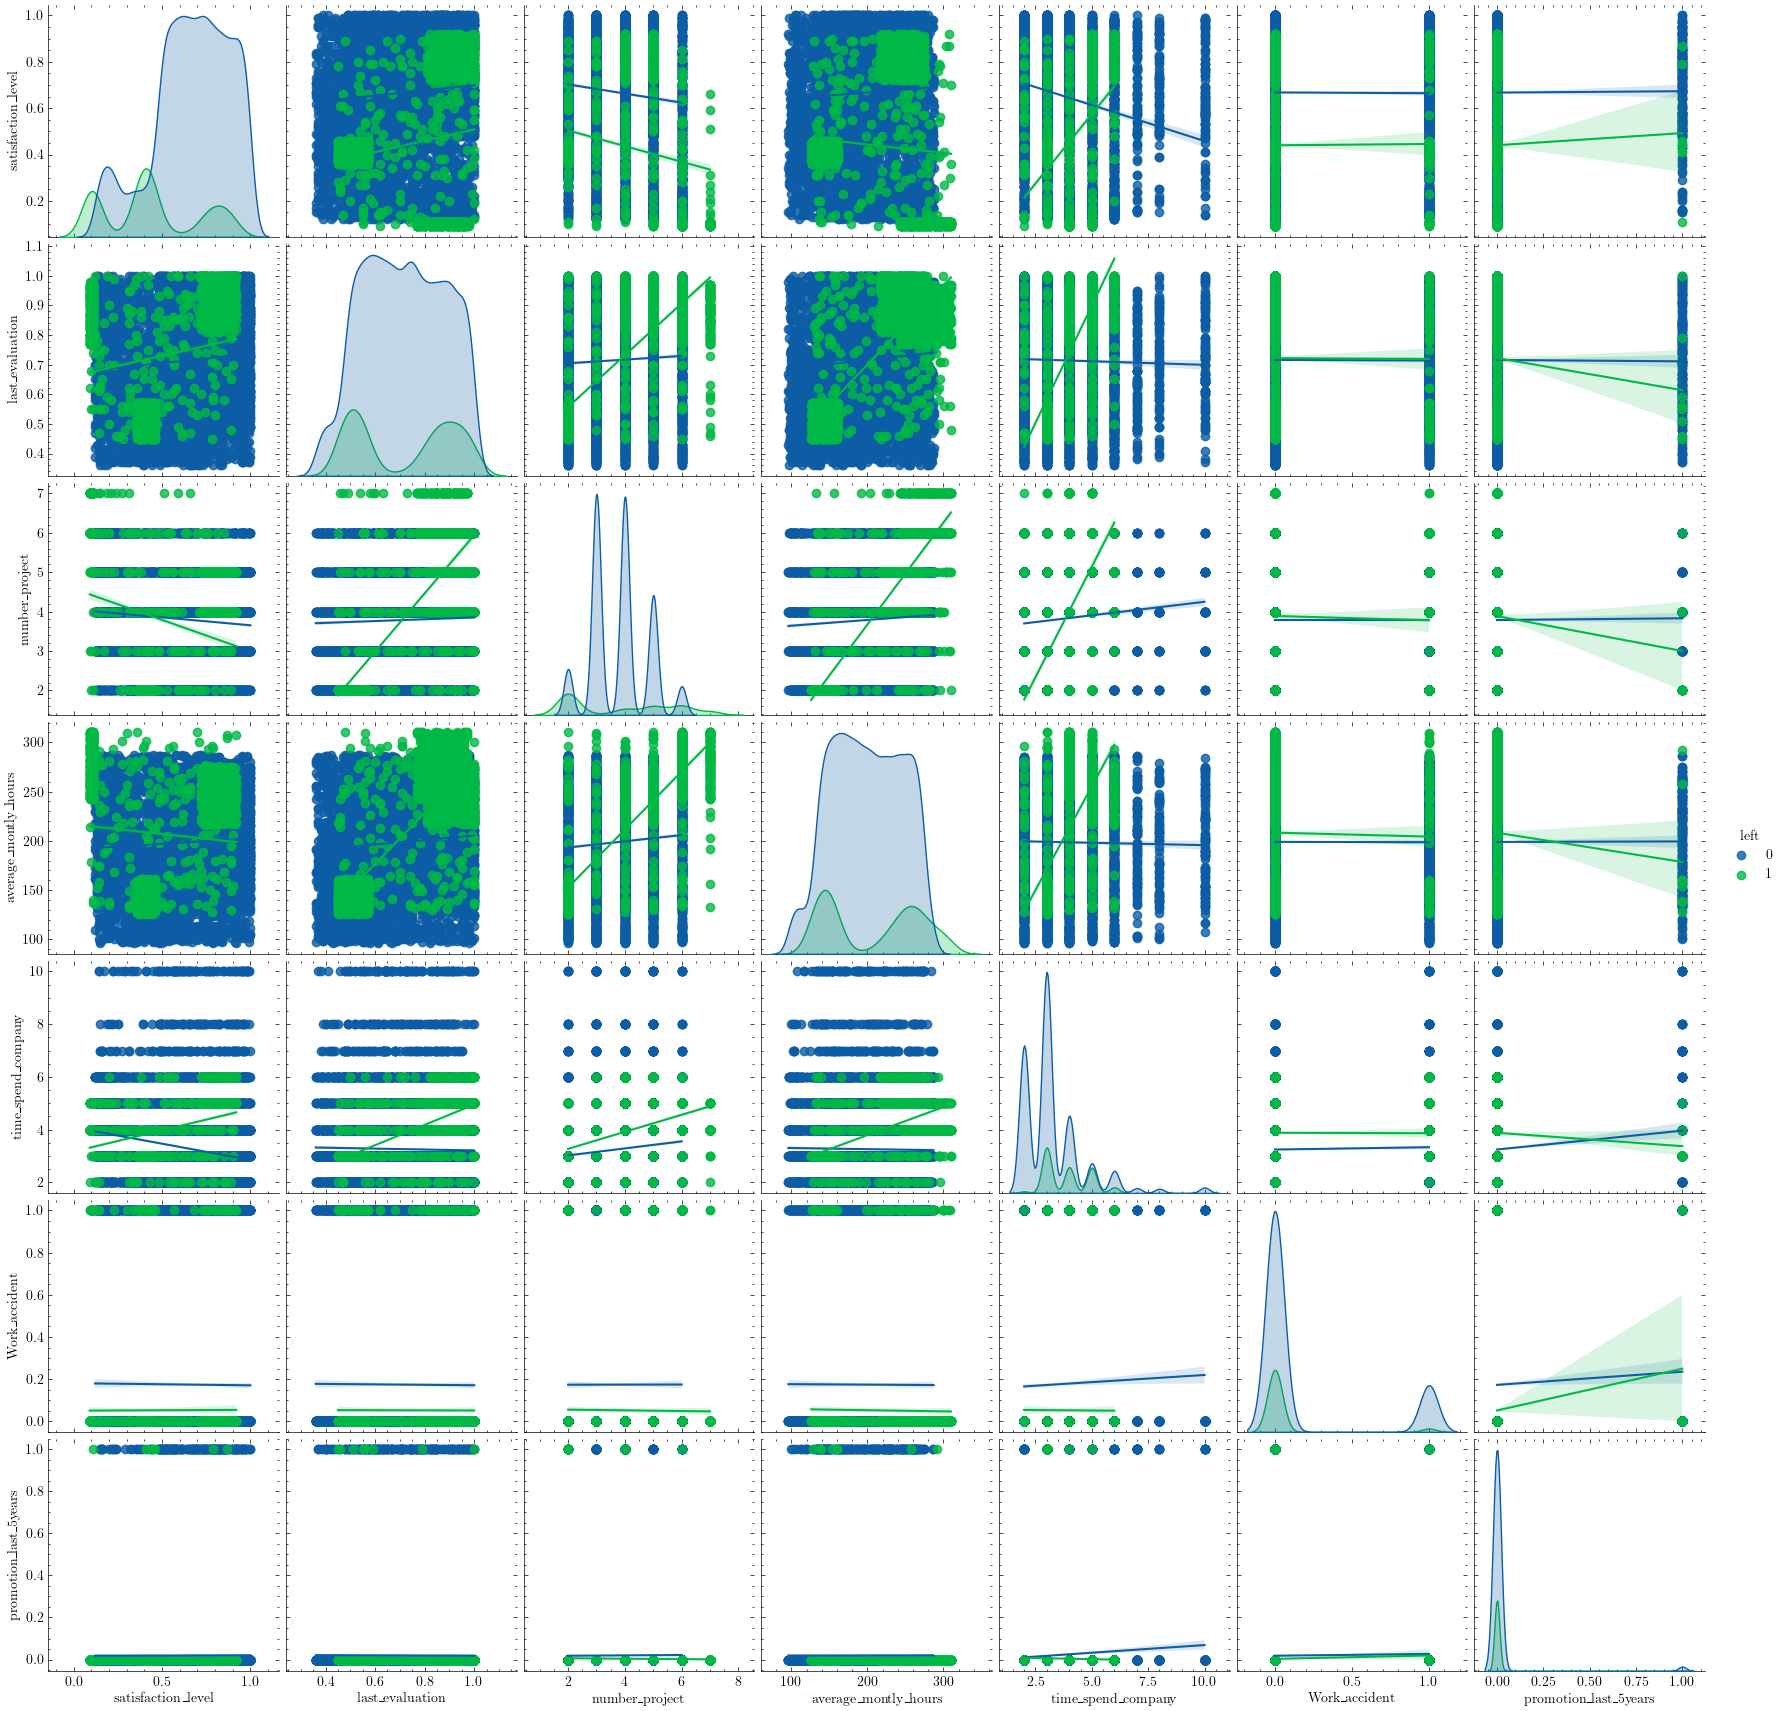

In [90]:
# 使用seaborn工具画图
plt.cla()
sns.pairplot(data,hue='left',kind='reg',diag_kind='kde')
plt.savefig('figure3_png.png',dpi=300)

# 分析和预测
## 挑出主要变量

In [92]:
# 先将字符串数据进行独热编码
data.head()
#发现有department 和salary
# data['Department'].value_counts()
#进行独热编码
dumm_Department = pd.get_dummies(data['Department'],prefix='Department').astype(int)
dumm_Salary = pd.get_dummies(data['salary'],prefix='salary').astype('int')
#删除原有的对象
dropped = data.drop(['Department','salary'],axis=1)
#JOIN按行拼接
data_new =dropped.join([dumm_Department,dumm_Salary],how = 'outer')
data_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


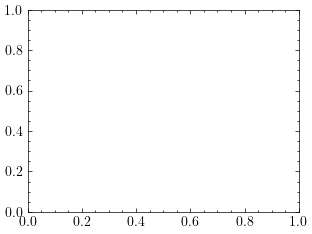

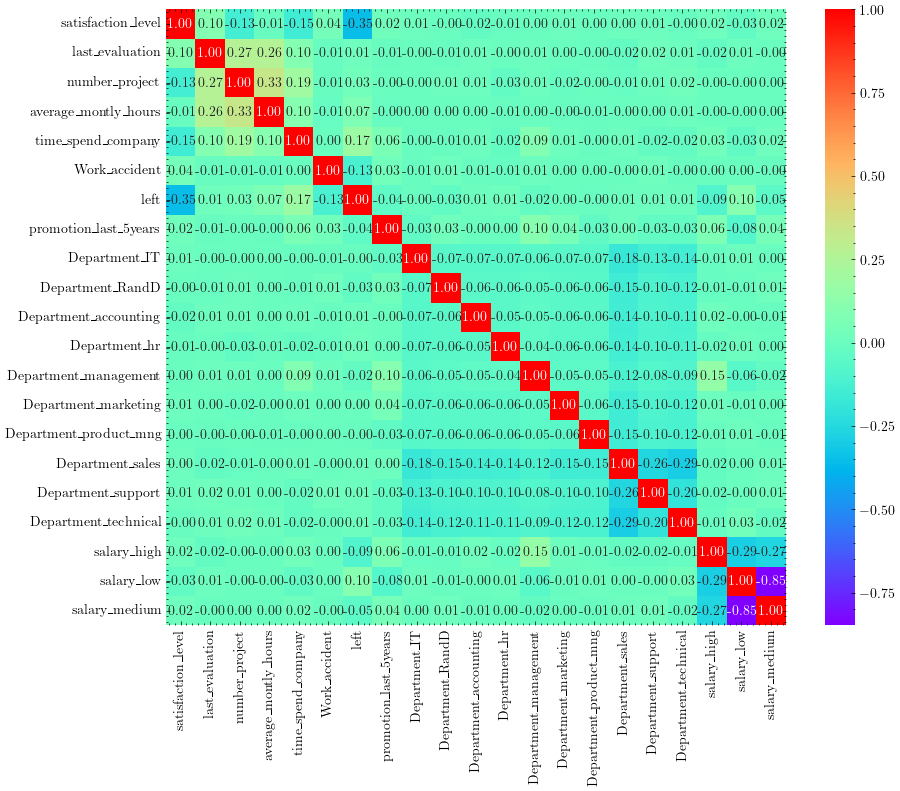

In [93]:
#相关性热力矩阵
plt.cla()
fig3 = plt.figure(figsize=(10,8))
corr = data_new.corr()
sns.heatmap(corr,annot=True,cmap='rainbow',fmt='.2f')
plt.savefig('figure4.svg')

## 训练集的划分,特征工程

In [95]:
X = data_new.drop('left',axis=1)
y = data_new['left'].astype(int)
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)
#对部分数值型数据进行标准化
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
6417,0.960257,-0.936544,1.031619,-1.226879,-1.024433,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
288,0.794729,1.144871,1.031619,0.638831,1.226222,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5042,-0.032913,-1.174420,-0.690649,-1.083363,-0.274215,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11123,-0.819173,0.133898,0.170485,-1.472907,1.976441,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3678,0.918875,0.431243,-0.690649,-0.919345,-0.274215,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## 逻辑回归模型

In [99]:
logreg =LogisticRegression(max_iter=1000,random_state=42)
#训练模型
logreg.fit(X_train,y_train)
#预测
y_pred = logreg.predict(X_test)
# 误差矩阵
class_report = metrics.classification_report(y_test,y_pred)
conf_martix = metrics.confusion_matrix(y_test,y_pred)
print(class_report)
print(conf_martix)

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.51      0.18      0.27       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.59      2399
weighted avg       0.80      0.83      0.80      2399

[[1928   70]
 [ 328   73]]


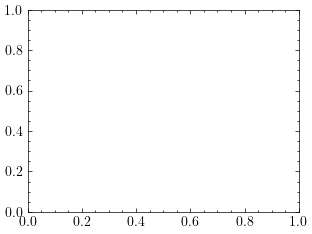

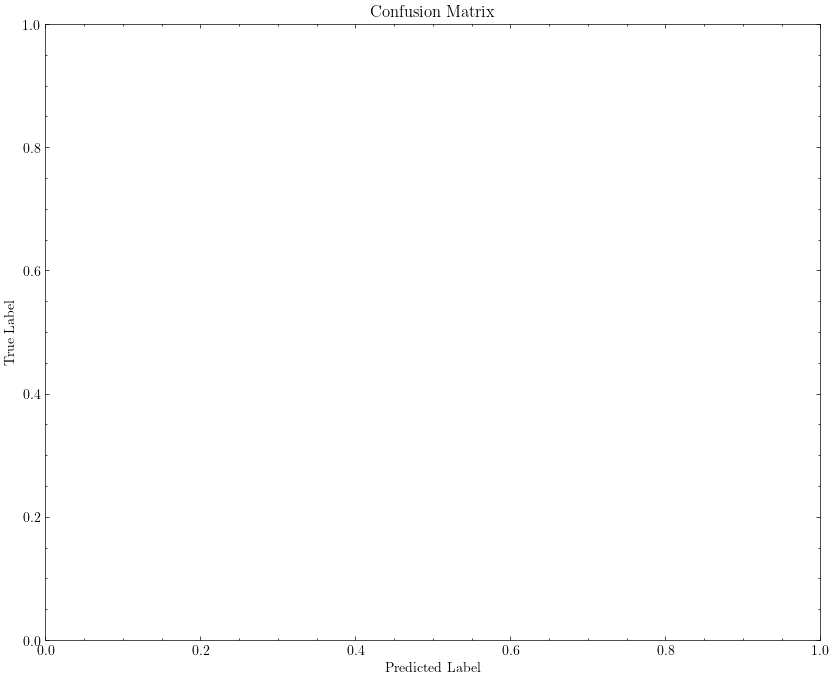

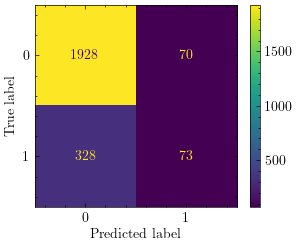

In [108]:
plt.cla()
fig4:plt.Figure = plt.figure(figsize=(10,8))
display = ConfusionMatrixDisplay(confusion_matrix=conf_martix,display_labels=['0','1'])
ax1:plt.Axes  = fig4.add_subplot(111)
plt.title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
display.plot()
plt.savefig('figure5.svg')

## 随机森林模型

In [109]:
# 寻找max_depth
d_scores = []
for i in range(1,20):
    RF = RandomForestClassifier(n_estimators=15,max_depth=i,random_state=42,criterion='entropy')
    RF.fit(X_train,y_train)
    d_scores.append(RF.score(X_test,y_test))
depth = d_scores.index(max(d_scores))
print('决策树深度: ',depth,'最优值为: ',max(d_scores))

决策树深度:  14 最优值为:  0.9783243017924135


In [110]:
# 按照最优深度,找最优决策树数目
n_scores = []
for i in range (1,105):
     RF = RandomForestClassifier(n_estimators=i,max_depth=14,random_state=42,criterion='entropy')
     RF.fit(X_train,y_train)
     n_scores.append(RF.score(X_test,y_test))
n_tree = n_scores.index(max(n_scores))
print('最优决策树数目: ',n_tree,'最优值为: ',max(n_scores))

最优决策树数目:  29 最优值为:  0.9791579824927052


In [112]:
#建立随机森林模型
rf = RandomForestClassifier(n_estimators=29,max_depth=14, random_state=42)
#模型训练
rf.fit(X_train, y_train)
#进行预测
y_pred_rf = rf.predict(X_test)
#报告
class_report_rf = metrics.classification_report(y_test, y_pred_rf)
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
print(class_report_rf,conf_matrix_rf)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399
 [[1989    9]
 [  44  357]]


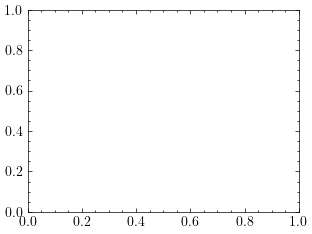

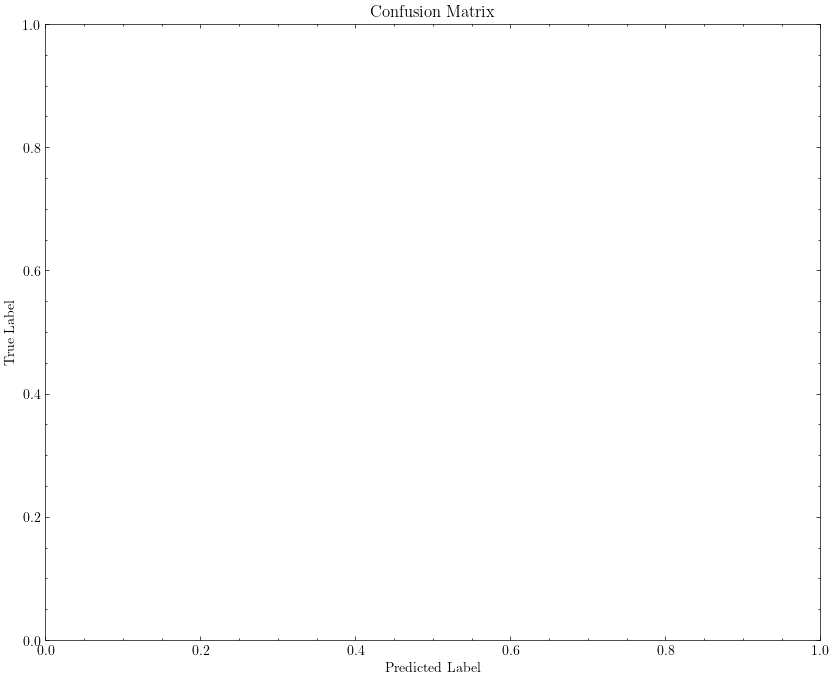

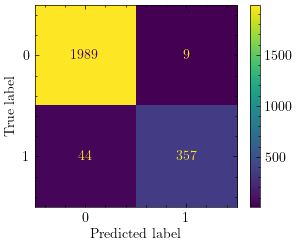

In [113]:
plt.cla()
fig5:plt.Figure = plt.figure(figsize=(10,8))
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf,display_labels=['0','1'])
ax1:plt.Axes  = fig5.add_subplot(111)
plt.title('Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
display.plot()
plt.savefig('figure6.svg')

# 结论

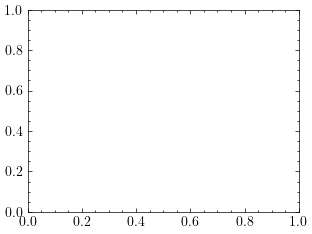

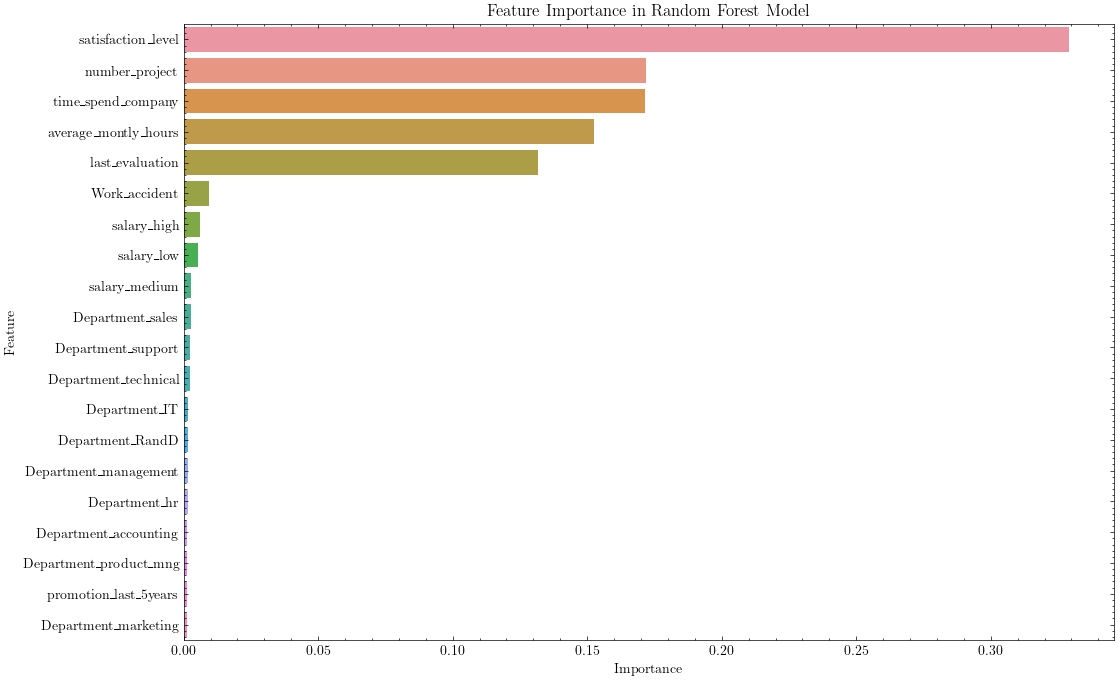

In [114]:
#拿到主要特征
feature_importances = rf.feature_importances_
#创建dataframe,储存重要影响因子
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
#对影响因子进行排序
features_df = features_df.sort_values(by='Importance', ascending=False)
#绘图
plt.cla()
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('figure7.svg')